# Explore here

In [81]:
#Step 1: Loading the dataset
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [82]:
#Storing the raw data in the ./data/raw folder
data.to_csv("../data/raw/data.csv", index = False)

In [83]:
#Step 2: Performing a full EDA
#Information about data types and non-null values

data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

(41188, 21)

In conclusion:
There are a total of 41188 rows and 21 columns.
The variables do not contain null values.  
The data has 10 numerical characteristics and 11 categorical characteristics.

In [84]:
#Eliminating irrelevant information
data.drop(["day_of_week", "campaign", "pdays", "previous"], axis = 1, inplace = True)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,149,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,226,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,307,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


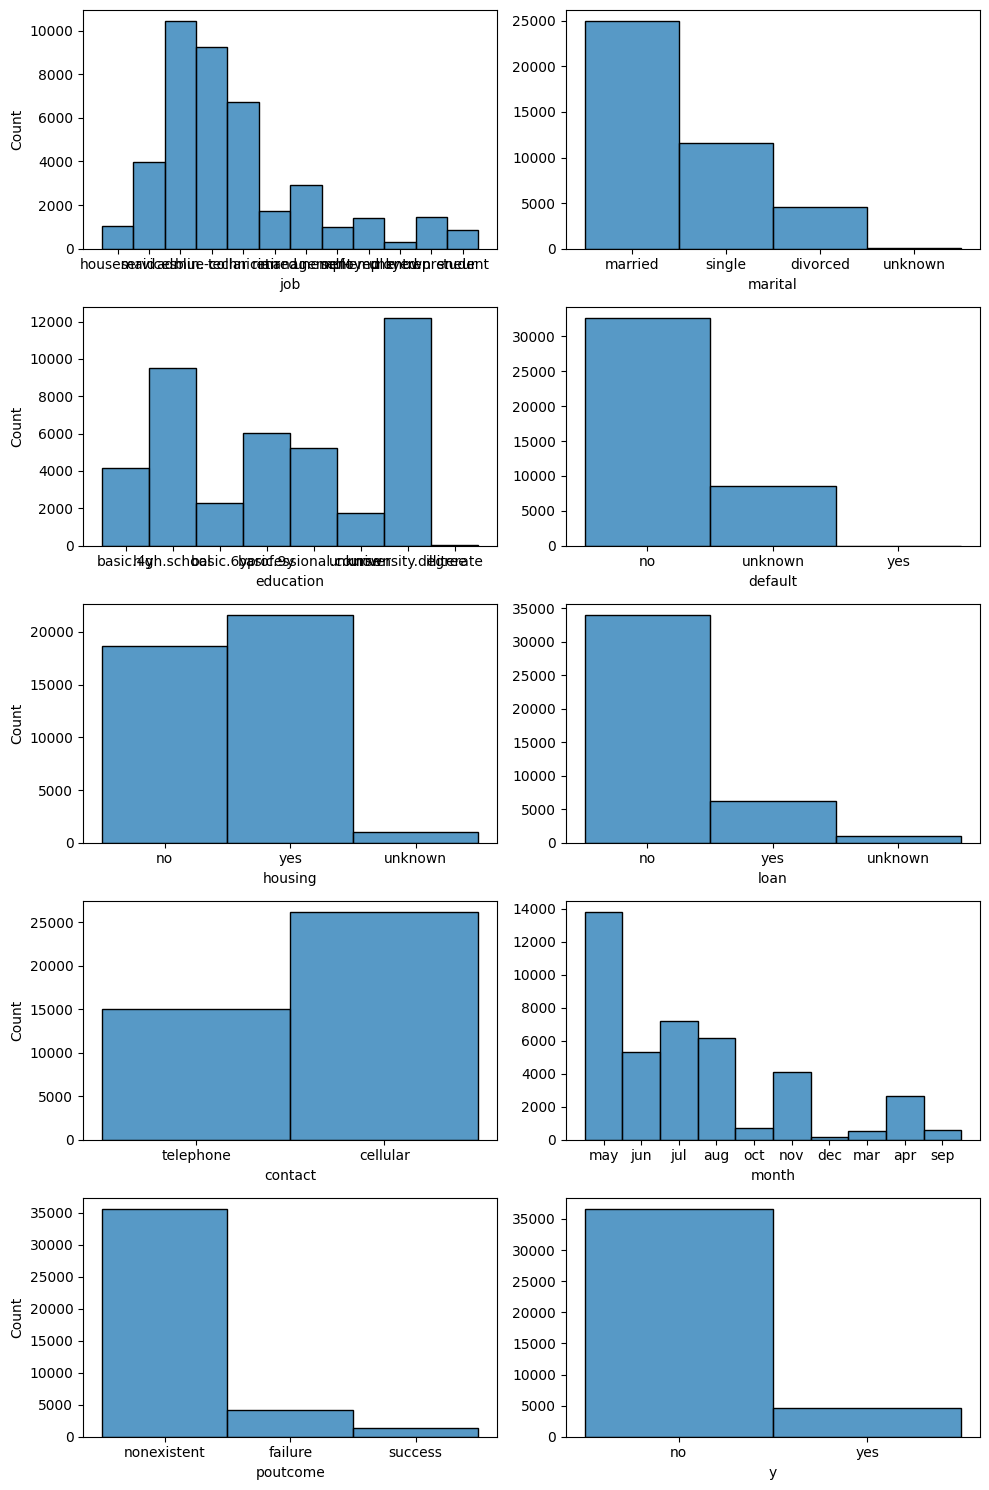

In [85]:
#Analysis of univariate (categorical) variables

import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(5, 2, figsize = (10, 15))

# Create a multiple histogram
sns.histplot(ax = axis[0, 0], data = data, x = "job")
sns.histplot(ax = axis[0, 1], data = data, x = "marital").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = data, x = "education")
sns.histplot(ax = axis[1, 1], data = data, x = "default").set(ylabel = None)
sns.histplot(ax = axis[2, 0], data = data, x = "housing")
sns.histplot(ax = axis[2, 1], data = data, x = "loan").set(ylabel = None)
sns.histplot(ax = axis[3, 0], data = data, x = "contact")
sns.histplot(ax = axis[3, 1], data = data, x = "month").set(ylabel = None)
sns.histplot(ax = axis[4, 0], data = data, x = "poutcome")
sns.histplot(ax = axis[4, 1], data = data, x = "y").set(ylabel = None)


# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

From the histograms we can see that the majority of the clients are married with university degree who work as a administrative, blue-collar or technician. Most of them have a housing loan rather than personal loan or credit. The principal contact type is mobile phone. The most active marketing campaign was in may; in summer many clients were contacted as well, however, after that period there was a dicline in activity. The previous marketing campaign was not very succesfull. And only about 15% of the clients are expected to take out a long-term deposit.

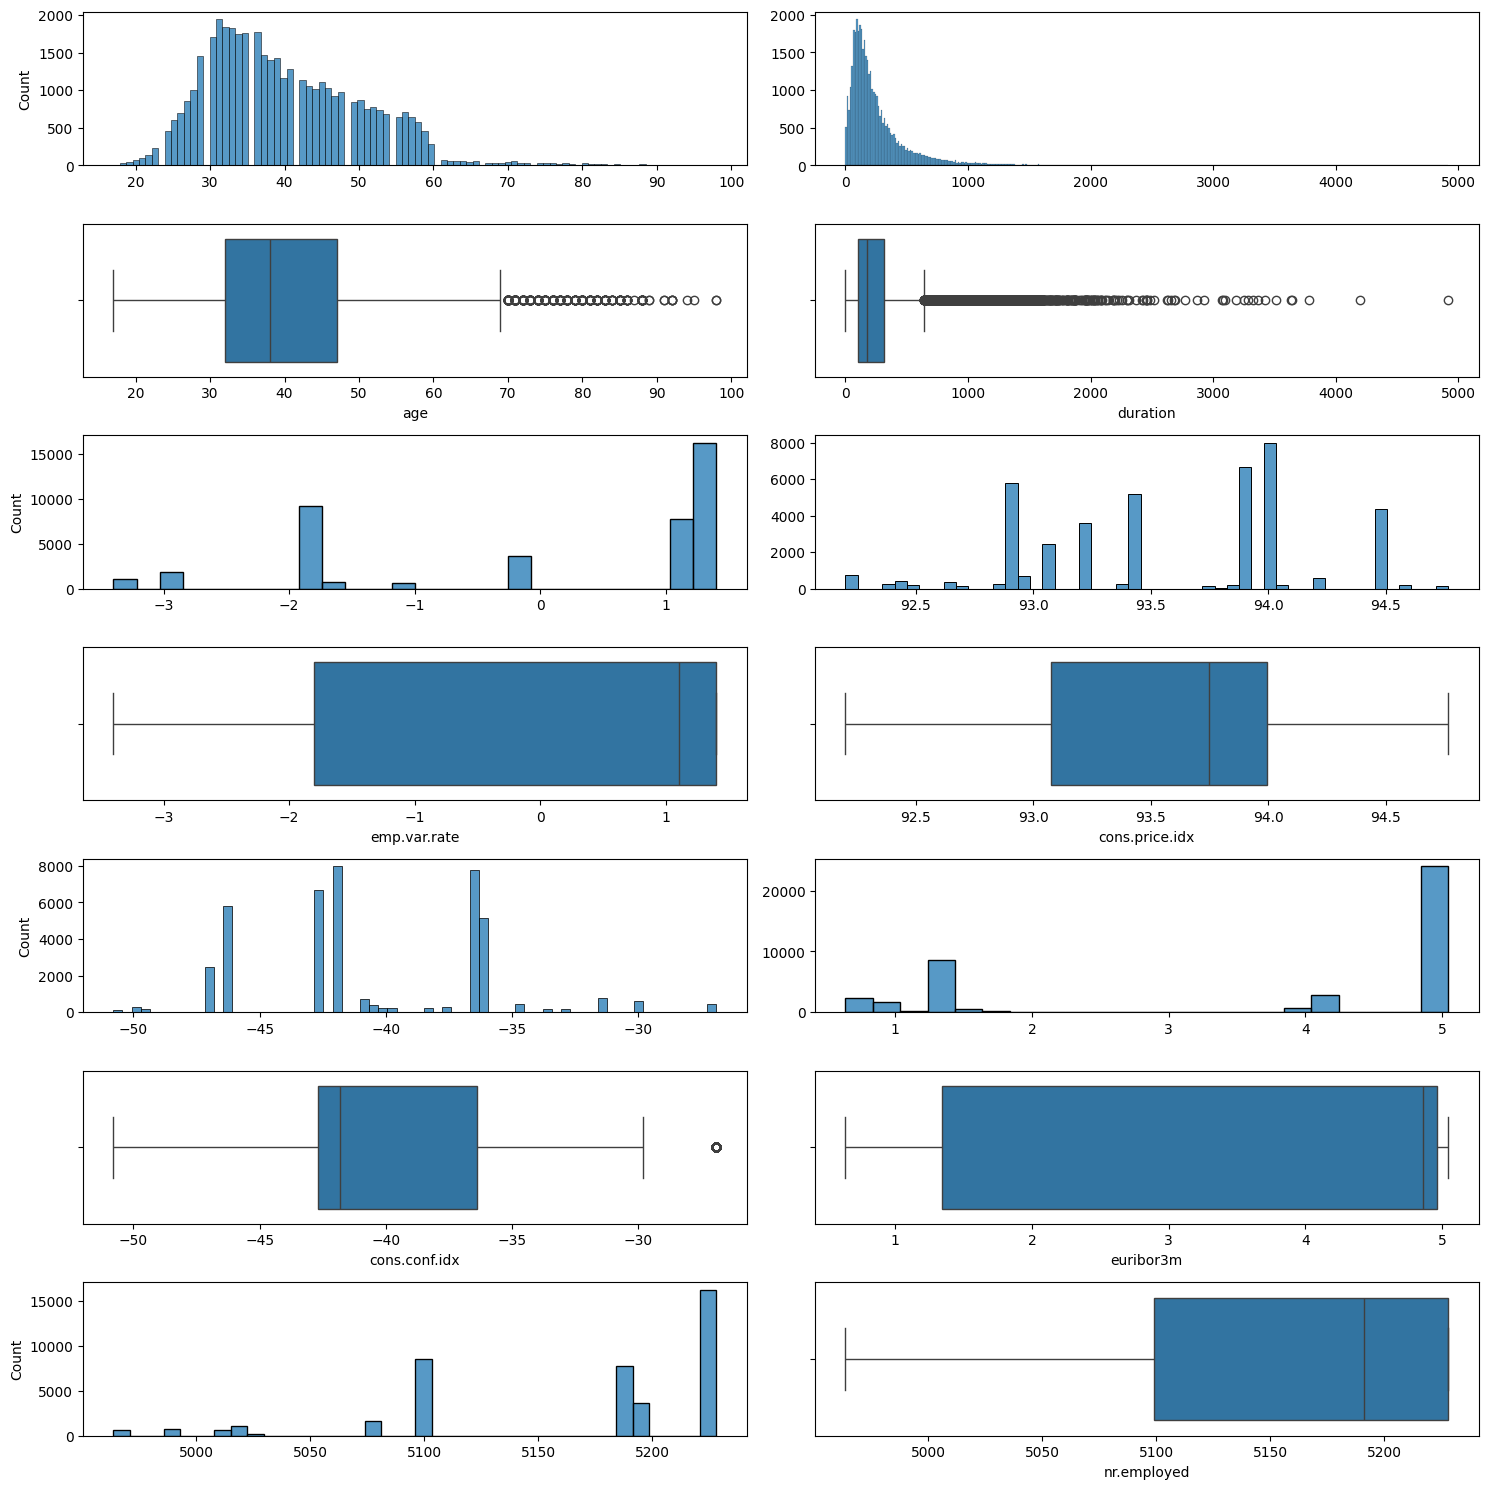

In [86]:
#Analysis on numeric variables
fig, axis = plt.subplots(7, 2, figsize = (15, 15))

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = data, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "age")
sns.histplot(ax = axis[0, 1], data = data, x = "duration").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "duration")
sns.histplot(ax = axis[2, 0], data = data, x = "emp.var.rate").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = data, x = "emp.var.rate")
sns.histplot(ax = axis[2, 1], data = data, x = "cons.price.idx").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = data, x = "cons.price.idx")
sns.histplot(ax = axis[4, 0], data = data, x = "cons.conf.idx").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = data, x = "cons.conf.idx")
sns.histplot(ax = axis[4, 1], data = data, x = "euribor3m").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5, 1], data = data, x = "euribor3m")
sns.histplot(ax = axis[6, 0], data = data, x = "nr.employed").set(xlabel = None)
sns.boxplot(ax = axis[6, 1], data = data, x = "nr.employed")


# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


The graphs above reveal that only age and duration have outliers.

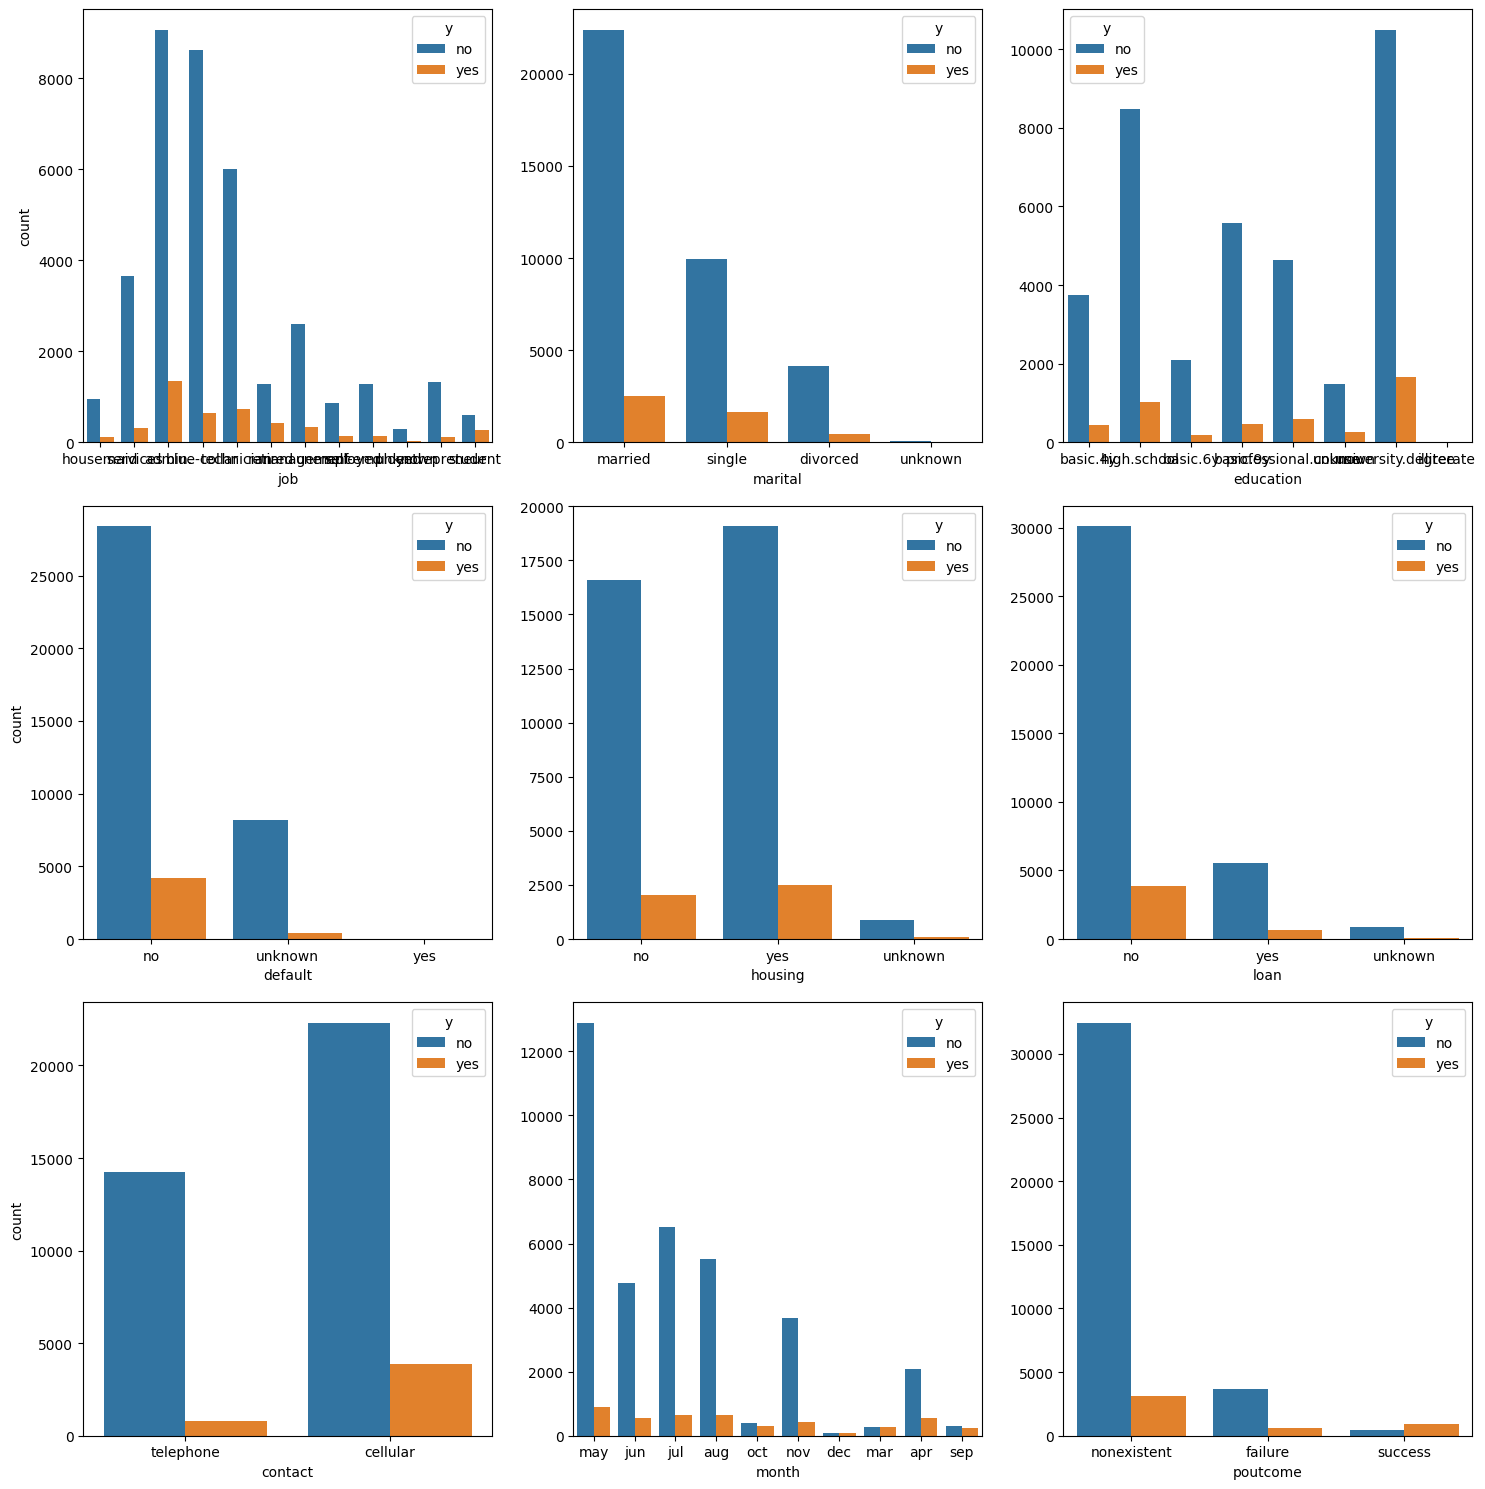

In [89]:
#Analysis of multivariate variables (categorical-categorical analysis)
fig, axis = plt.subplots(3, 3, figsize = (15, 15))

sns.countplot(ax = axis[0, 0], data = data, x = "job", hue = "y")
sns.countplot(ax = axis[0, 1], data = data, x = "marital", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = data, x = "education", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = data, x = "default", hue = "y")
sns.countplot(ax = axis[1, 1], data = data, x = "housing", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 2], data = data, x = "loan", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[2, 0], data = data, x = "contact", hue = "y")
sns.countplot(ax = axis[2, 1], data = data, x = "month", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[2, 2], data = data, x = "poutcome", hue = "y").set(ylabel = None)

plt.tight_layout()

plt.show()

The graphs above show that there is a high posibiity that the client takes out a long-term deposit if he is administrative or blue-collar, he/she is married, has a high or at least high school degree, does not have personal loan, neither credit, and is contacted by cellular.

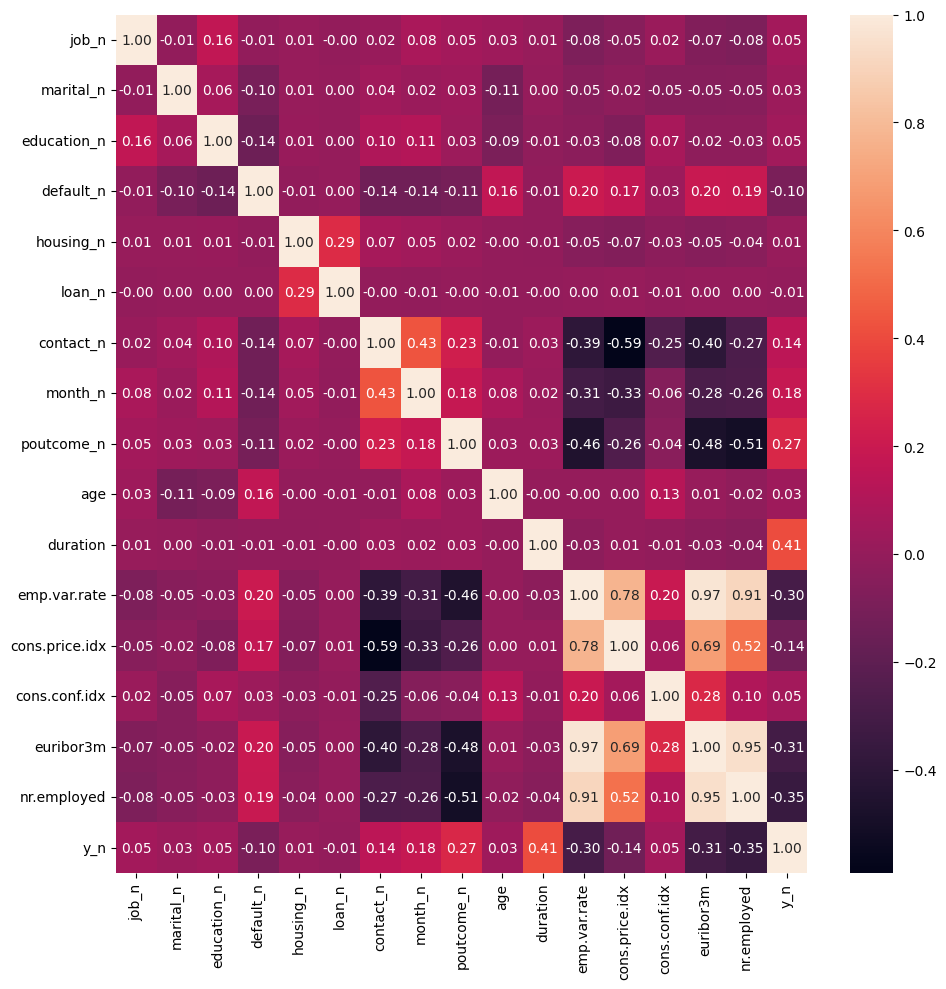

In [92]:
# Numerical-categorical analysis (complete)
# Factorizing (convert categorical values into numerical labels) values
data["job_n"] = pd.factorize(data["job"])[0]
data["marital_n"] = pd.factorize(data["marital"])[0]
data["education_n"] = pd.factorize(data["education"])[0]
data["default_n"] = pd.factorize(data["default"])[0]
data["housing_n"] = pd.factorize(data["housing"])[0]
data["loan_n"] = pd.factorize(data["loan"])[0]
data["contact_n"] = pd.factorize(data["contact"])[0]
data["month_n"] = pd.factorize(data["month"])[0]
data["poutcome_n"] = pd.factorize(data["poutcome"])[0]
data["y_n"] = pd.factorize(data["y"])[0]


num_variables = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "poutcome_n",
                 "age", "duration", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]

fig, axis = plt.subplots(figsize = (10, 10))

sns.heatmap(data[num_variables].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

There is a strong negative relationship between poutcome (result of the previous marketing campaign) and the indicators (euribor, consumer price index, etc.), which makes a lot of sense, the grow of interst rates and prices affect marketing activiies. On the other hand, there is a strong positive relationship between employment variation rate and the indexes. As for the target variable, the stronger correlation observed with duration (the longer the previous contact the high the posibility that the customer takes out a long-term deposit).

In [93]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(data[num_variables])
data_scal = pd.DataFrame(scal_features, index = data.index, columns = num_variables)
data_scal.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,poutcome_n,age,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_n
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.481481,0.053070,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0,0.493827,0.030297,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.0,0.246914,0.045954,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.283951,0.030704,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.0,0.481481,0.062424,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


In [94]:
#Feature selection
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import train_test_split

# Dividing the dataset into training and test samples
X = data_scal.drop("y_n", axis = 1)
y = data_scal["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

#Store the intermediate data in the ./data/interim folder
#data_scal.to_csv("../data/interim/bank-marketing-campaign-data.csv", index = False)


,poutcome_n,duration,emp.var.rate,euribor3m,nr.employed
0,0.0,0.019113,1.000000,0.980730,1.000000
1,0.0,0.023587,0.333333,0.138291,0.512287
2,0.5,0.002643,0.333333,0.163228,0.512287
3,0.0,0.019113,1.000000,0.980957,1.000000
4,0.0,0.069947,0.937500,0.958059,0.859735


In [95]:
X_test_sel.head()

,poutcome_n,duration,emp.var.rate,euribor3m,nr.employed
0,0.5,0.075437,0.333333,0.150759,0.512287
1,0.0,0.057950,0.937500,0.958059,0.859735
2,0.5,0.010573,0.333333,0.153933,0.512287
3,0.0,0.072184,1.000000,0.982317,1.000000
4,0.0,0.038430,1.000000,0.981410,1.000000


In [96]:
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)
X_train_sel.to_csv("/workspaces/Liutciia-logistic-regression/data/processed/bank-marketing-campaign-data_train.csv", index=False)
X_test_sel.to_csv("/workspaces/Liutciia-logistic-regression/data/processed/bank-marketing-campaign-data_test.csv", index=False)

In [97]:
#Step 3: Building a logistic regression model
#Reading the processed dataset
import pandas as pd

train_data = pd.read_csv("../data/processed/bank-marketing-campaign-data_train.csv")
test_data = pd.read_csv("../data/processed/bank-marketing-campaign-data_test.csv")

train_data.head()


,poutcome_n,duration,emp.var.rate,euribor3m,nr.employed,y_n
0,0.0,0.019113,1.000000,0.980730,1.000000,0.0
1,0.0,0.023587,0.333333,0.138291,0.512287,0.0
2,0.5,0.002643,0.333333,0.163228,0.512287,0.0
3,0.0,0.019113,1.000000,0.980957,1.000000,0.0
4,0.0,0.069947,0.937500,0.958059,0.859735,0.0


In [98]:
X_train = train_data.drop(["y_n"], axis = 1)
y_train = train_data["y_n"]
X_test = test_data.drop(["y_n"], axis = 1)
y_test = test_data["y_n"]

In [99]:
#Initialization and training of the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [100]:
#Model prediction
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 1., 0.])

In [101]:
#Using metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

#Accuracy score
accuracy_score(y_test, y_pred)

0.9053168244719592

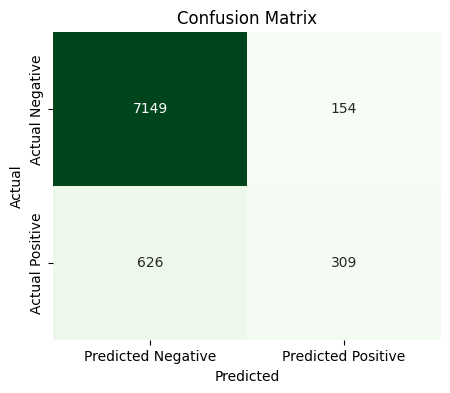

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Computing the confusion matrix
marketing_campaign = confusion_matrix(y_test, y_pred)

# Converting the confusion matrix to a DataFrame for easier visualization
cm_df = pd.DataFrame(marketing_campaign, 
                     index=['Actual Negative', 'Actual Positive'], 
                     columns=['Predicted Negative', 'Predicted Positive'])

# Ploting the confusion matrix
plt.figure(figsize=(5, 4)) 
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False, cmap='Greens')  # Adding a color map for better visual distinction
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The interpretation of a confusion matrix is as follows:

True positive (TP): corresponds to the number 309 and are the cases where the model predicted positive (take a deposit) and the actual class is also positive.
True negative (TN): corresponds to the number 7149 and are the cases where the model predicted negative (no take a deposit) and the actual class is also negative.
False positive (FP): corresponds to the number 154 and are the cases in which the model predicted positive, but the actual class is negative.
False negative (FN): corresponds to the number 626 and are the cases where the model predicted negative, but the actual class is positive.

In [103]:
#Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

#Conclusion: of all the samples predicted as positive, 67% were actually positive

Precision: 0.6673866090712743


In [104]:
#Recall (Sensitivity)
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')
#Conclusion: of all the positive samples, 33% were correctly predicted as positive

Recall: 0.3304812834224599


In [105]:
#F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')
#Conclusion: A low F1 score indicates that the model is not performing well in balancing precision and recall.

F1 Score: 0.44206008583690987


In [110]:
#Step 4: Optimizing the previous model
#Grid search
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [111]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'sag'}


In [112]:
model_grid = LogisticRegression(penalty = "l2", C = 1, solver = "sag")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.9058023792182569

As we can see modifying the model parameters leads to the same results 90% (accuracy and grid_accuracy).

In [113]:
from pickle import dump

dump(model, open("../models/logistic_regression_C-0.1_penalty-l2_solver-liblinear_42.sav", "wb"))